In [11]:
import pandas as pd
import numpy as np
import sys
import os
import importlib

sys.path.append(os.path.abspath(".."))

import src.utils.eda as eda
import src.pipeline.create_meta_features as cmf

In [5]:
# 前処理データの読み込み
train_data = pd.read_csv("../artifacts/prepro/train_data1.csv")

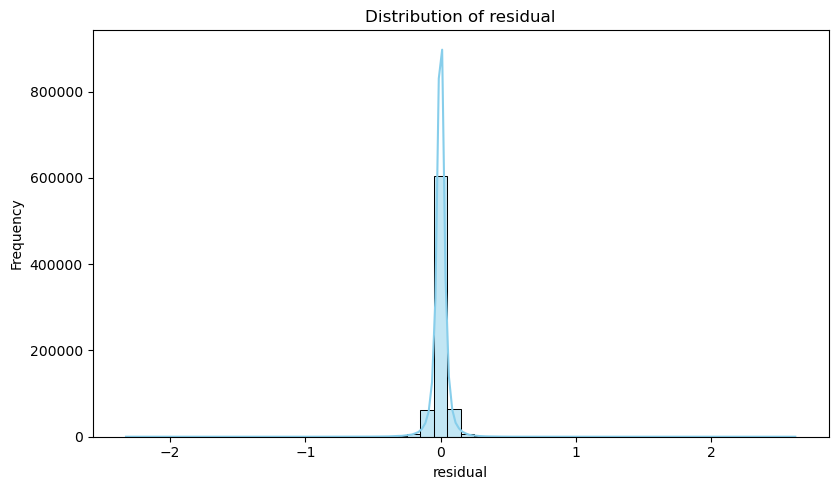

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
residual,750000.0,0.000005,0.059894,-2.325483,-0.177858,-0.076143,-0.048175,-0.019857,0.000865,0.021463,0.048997,0.075144,0.161628,2.622677


In [6]:
# 残差の分布を確認
importlib.reload(eda)
oof = np.load("../artifacts/oof/single/oof_single_2.npy")
residual = train_data["target"].values - oof

residual_df = pd.DataFrame(residual, columns=["residual"])

eda.plot_numerical_distribution(residual_df, bins=50)

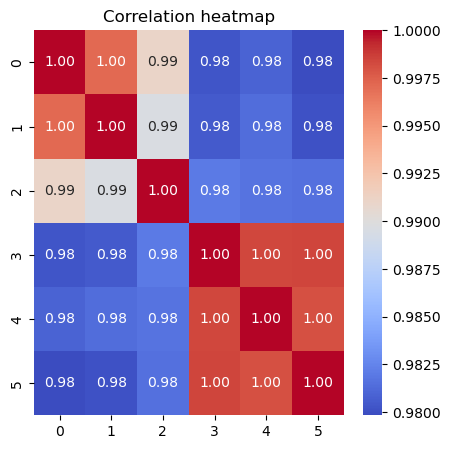

In [10]:
# 予測値の相関係数を確認
# xgb, cb, mlp, rfr, logreg, logreg
oof1 = np.load("../artifacts/oof/single/oof_single_3.npy")
oof2 = np.load("../artifacts/oof/single/oof_single_14.npy")
oof3 = np.load("../artifacts/oof/single/oof_single_8.npy")
oof4 = np.load("../artifacts/oof/single/oof_single_4.npy")
oof5 = np.load("../artifacts/oof/single/oof_single_6.npy")
oof6 = np.load("../artifacts/oof/single/oof_single_7.npy")

residual1 = train_data["target"].values - oof1
residual2 = train_data["target"].values - oof2
residual3 = train_data["target"].values - oof3
residual4 = train_data["target"].values - oof4
residual5 = train_data["target"].values - oof5
residual6 = train_data["target"].values - oof6

residual_array = np.stack([
    residual1, residual2, residual3,
    residual4, residual5, residual6], axis=1)

residual_df = pd.DataFrame(residual_array)

eda.show_corr_heatmap(residual_df)

In [16]:
# メタ特徴量の作成
importlib.reload(cmf)
tr_df, test_df = cmf.create_meta_features([2, 14])
np.save()
np.save()